<a href="https://colab.research.google.com/github/argxsL/CCADMACL_Exercises/blob/main/Exercise%204B/Exercise4b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 4B

In this exercise, you will learn how to use PCA for dimensionality reduction to visualize clusters and then run a clustering algorithm.

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
from sklearn.datasets import load_breast_cancer
df = load_breast_cancer(as_frame=True).frame

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [121]:
X = df.drop('target', axis=1)

1. Perform scaling `(10 pts)`

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
# Convert to pandas Dataframe
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
# Print the scaled data
X_scaled_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


2. Perform dimensionality reduction using PCA `(10 pts)`

In [66]:
pca_3 = PCA(n_components=3)
X_reduced = pca_3.fit_transform(X_scaled_df)

In [67]:
X_reduced.shape

(569, 3)

In [43]:
pca_7 = PCA(n_components=7)
X_reduced_7 = pca_7.fit_transform(X_scaled_df)

In [44]:
X_reduced_7.shape

(569, 7)

3. Get the total explained variance `(5 pts)`

In [128]:
explained_variance = pca_3.explained_variance_ratio_

PC1_explainedvariance = explained_variance[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance = explained_variance[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance = explained_variance[2]
print("Explained variance of PC3", PC3_explainedvariance)

Explained variance of PC1 0.44272025607526366
Explained variance of PC2 0.18971182044033078
Explained variance of PC3 0.09393163257431389


In [69]:
print("Total explained variance:", explained_variance.sum())

Total explained variance: 0.7263637090899083


7 components is necessary for over 90% explained variance but for the activity 2 or 3 components is much better.

In [127]:
explained_variance_7 = pca_7.explained_variance_ratio_

PC1_explainedvariance_7 = explained_variance_7[0]
print("Explained variance of PC1", PC1_explainedvariance)

PC2_explainedvariance_7 = explained_variance_7[1]
print("Explained variance of PC2", PC2_explainedvariance)

PC3_explainedvariance_7 = explained_variance_7[2]
print("Explained variance of PC3", PC3_explainedvariance)

PC4_explainedvariance_7 = explained_variance_7[3]
print("Explained variance of PC4", PC4_explainedvariance)

PC5_explainedvariance_7 = explained_variance_7[4]
print("Explained variance of PC5", PC5_explainedvariance)

PC6_explainedvariance_7 = explained_variance_7[5]
print("Explained variance of PC3", PC6_explainedvariance)

PC7_explainedvariance_7 = explained_variance_7[6]
print("Explained variance of PC7", PC6_explainedvariance)

Explained variance of PC1 0.44272025607526366
Explained variance of PC2 0.18971182044033078
Explained variance of PC3 0.09393163257431389
Explained variance of PC4 0.06602134915470147
Explained variance of PC5 0.05495768492346265
Explained variance of PC3 0.0402452203988335
Explained variance of PC7 0.0402452203988335


In [47]:
print("Total explained variance:", explained_variance.sum())

Total explained variance: 0.9100953006967311


4. Plot the explained variances of each principal component `(5 pts)`

Text(0, 0.5, 'Explained Variance')

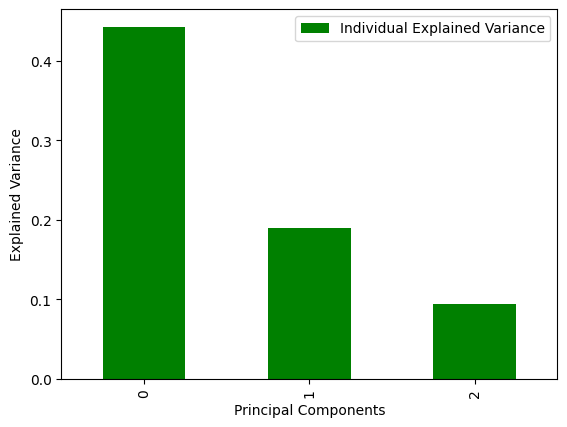

In [91]:
pd.DataFrame(explained_variance).plot.bar(color='green')
plt.legend(['Individual Explained Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

Text(0, 0.5, 'Explained Variance')

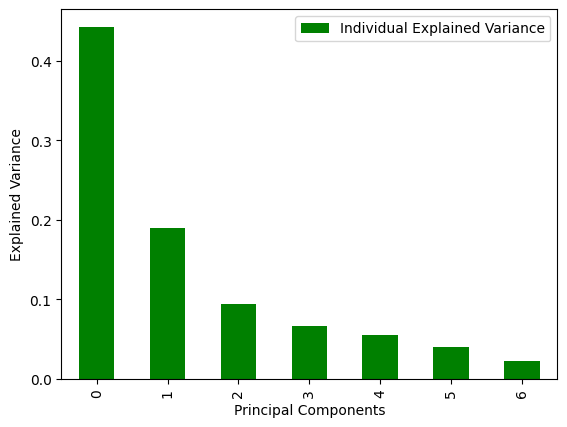

In [134]:
# for 7 components only
pd.DataFrame(explained_variance_7).plot.bar(color='green')
plt.legend(['Individual Explained Variance'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')

5. Visualize the dataset after PCA using a scatter plot `(5 pts)`

In [99]:
X_reduced_df = pd.DataFrame(X_reduced, columns=['PC1', 'PC2', 'PC3'])

In [102]:
X_reduced

array([[ 9.19283683,  1.94858307, -1.12316616],
       [ 2.3878018 , -3.76817174, -0.52929269],
       [ 5.73389628, -1.0751738 , -0.55174759],
       ...,
       [ 1.25617928, -1.90229671,  0.56273053],
       [10.37479406,  1.67201011, -1.87702933],
       [-5.4752433 , -0.67063679,  1.49044308]])

In [101]:
X_reduced_df

,PC1,PC2,PC3
0,9.192837,1.948583,-1.123166
1,2.387802,-3.768172,-0.529293
2,5.733896,-1.075174,-0.551748
3,7.122953,10.275589,-3.232790
4,3.935302,-1.948072,1.389767
...,...,...,...
564,6.439315,-3.576817,2.459487
565,3.793382,-3.584048,2.088476
566,1.256179,-1.902297,0.562731
567,10.374794,1.672010,-1.877029


In [100]:
fig = px.scatter_3d(X_reduced_df,x='PC1',y='PC2',z='PC3')
fig.show()

6. Perform clustering using any clustering algorithm `(10 pts)`

In [109]:
# cluster with no feature engineering
agglo = AgglomerativeClustering(n_clusters=2,linkage='ward')
# Model Fit
model = agglo.fit(X_reduced_df)
print(model)

X_reduced_df['target'] = model.labels_
print('Clusters assigned to each datapoints, cluster = 2 :')
print(X['target'])

AgglomerativeClustering()
Clusters assigned to each datapoints, cluster = 2 :
0      1
1      1
2      1
3      2
4      1
      ..
564    1
565    1
566    0
567    1
568    0
Name: target, Length: 569, dtype: int64


In [110]:
fig = px.scatter_3d(X_reduced_df,x='PC1',y='PC2',z='PC3', color='target')
fig.show()

In [133]:
# for 7 components only
X_reduced_7_df = pd.DataFrame(X_reduced_7, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7'])
model = agglo.fit(X_reduced_7_df)
X_reduced_7_df['target'] = model.labels_

7. View the loading scores of each principal component `(5 pts)`

In [123]:
loadings = pca_3.components_.T * np.sqrt(pca_3.explained_variance_)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3'], index=X.columns)
loading_matrix

,PC1,PC2,PC3
mean radius,0.798469,-0.558394,-0.014334
mean texture,0.378346,-0.142564,0.108454
mean perimeter,0.829965,-0.513800,-0.015649
mean area,0.806101,-0.551755,0.048220
mean smoothness,0.520110,0.444392,-0.175226
mean compactness,0.872817,0.362680,-0.124485
mean concavity,0.942542,0.143660,0.004593
mean concave points,0.951490,-0.083016,-0.042951
mean symmetry,0.503978,0.454506,-0.067609
mean fractal dimension,0.234772,0.875292,-0.037928


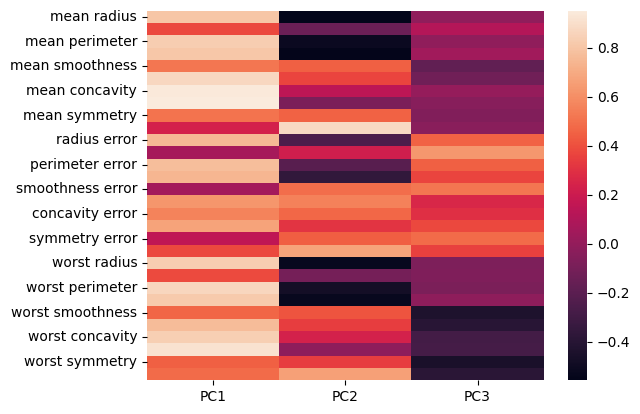

In [124]:
# Heat map
sns.heatmap(loading_matrix)
plt.show()

In [136]:
# for 7 components only
loadings_7 = pca_7.components_.T * np.sqrt(pca_7.explained_variance_)
loading_matrix_7 = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7'], index=X.columns)
loading_matrix_7

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
mean radius,0.798469,-0.558394,-0.014334,-0.058328,-0.048561,0.020610,-0.102055
mean texture,0.378346,-0.142564,0.108454,0.849451,0.063575,-0.035389,0.009375
mean perimeter,0.829965,-0.513800,-0.015649,-0.059137,-0.048032,0.019035,-0.094151
mean area,0.806101,-0.551755,0.048220,-0.075266,-0.013277,-0.002076,-0.042482
mean smoothness,0.520110,0.444392,-0.175226,-0.224505,0.469197,-0.314945,-0.115692
mean compactness,0.872817,0.362680,-0.124485,-0.044786,-0.015041,-0.015541,0.025429
mean concavity,0.942542,0.143660,0.004593,-0.026936,-0.111006,-0.010276,-0.088429
mean concave points,0.951490,-0.083016,-0.042951,-0.092032,0.056368,-0.057243,-0.123763
mean symmetry,0.503978,0.454506,-0.067609,-0.094552,0.393183,0.392020,-0.077220
mean fractal dimension,0.234772,0.875292,-0.037928,-0.068439,0.057092,-0.131346,0.243245


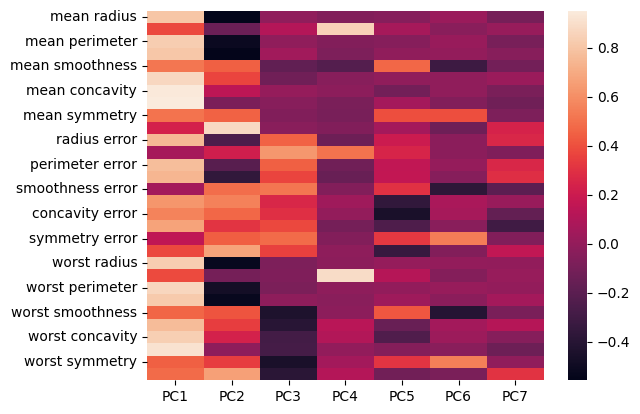

In [137]:
# Heat map
sns.heatmap(loading_matrix_7)
plt.show()